In [2]:
import zipfile as zf
files = zf.ZipFile("Face-Sketch-to-Image-Generation-using-GAN-master.zip",'r')
files.extractall('Training photo')
files.close()

In [3]:
import zipfile as zf
files = zf.ZipFile("Face-Sketch-to-Image-Generation-using-GAN-master.zip",'r')
files.extractall('Training sketch')
files.close()

In [35]:
import zipfile as zf
files = zf.ZipFile("Face-Sketch-to-Image-Generation-using-GAN-master.zip",'r')
files.extractall('Testing photo')
files.close()

In [36]:
import zipfile as zf
files = zf.ZipFile("Face-Sketch-to-Image-Generation-using-GAN-master.zip",'r')
files.extractall('Testingphoto')
files.close()

In [3]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\ASUS\AppData\Local\Temp\pip-install-t2dnwr78\tensorflow-gpu_00151ec4e44644d49e7034ec2b966d16\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build wheels for tensorflow-gpu, which is required to install pyproject.toml-b

In [2]:
!pip install --upgrade pip

                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB 1.9 MB/s eta 0:00:02
     --                                       0.1/2.1 MB 1.4 MB/s eta 0:00:02
     -------                                  0.4/2.1 MB 2.9 MB/s eta 0:00:01
     -------                                  0.4/2.1 MB 2.3 MB/s eta 0:00:01
     -----------------                        0.9/2.1 MB 4.1 MB/s eta 0:00:01
     -----------------                        0.9/2.1 MB 4.1 MB/s eta 0:00:01
     ------------------------------           1.6/2.1 MB 5.1 MB/s eta 0:00:01
     --------------------------------         1.7/2.1 MB 5.1 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 5.3 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
print(len(tf.config.experimental.list_physical_devices('GPU')))

0


In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
import os
import numpy as np
import glob
from PIL import Image

In [26]:
def random_shearing(img, num, border):
    rows = img.shape[0]
    cols = img.shape[1]
    if num == 0:
        pts1 = np.float32([[5,5],[20,5],[2,20]])
        pts2 = np.float32([[10,10],[20,5],[5,25]])
    elif num == 1:
        pts1 = np.float32([[5,5],[15,5],[2,20]])
        pts2 = np.float32([[5,10],[10,10],[5,25]])
    elif num == 2:
        pts1 = np.float32([[5,5],[15,5],[5,20]])
        pts2 = np.float32([[5,10],[10,10],[5,25]])
    elif num == 3:
        pts1 = np.float32([[5,5],[10,5],[2,20]])
        pts2 = np.float32([[5,10],[10,10],[5,25]])
    elif num == 4:
        pts1 = np.float32([[5,5],[10,5],[2,20]])
        pts2 = np.float32([[5,10],[10,10],[5,30]])
    else:
        pts1 = np.float32([[5,5],[10,5],[10,20]])
        pts2 = np.float32([[5,10],[10,10],[5,30]])
    M = cv2.getAffineTransform(pts1,pts2)
    return cv2.warpAffine(img, M, (cols,rows), borderValue=border)

def random_rotation(img, degree, border):
    rows = img.shape[0]
    cols = img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),degree,1)
    return cv2.warpAffine(img,M,(cols,rows), borderValue=border)

In [27]:
def transform_image(img, skt, ang_range, shear_range, trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    # Border
    
    border_img = tuple([int(img[0][0][0]), int(img[0][0][1]), int(img[0][0][2])])
    border_skt = tuple([int(skt[0][0][0]), int(skt[0][0][1]), int(skt[0][0][2])])

    img = cv2.warpAffine(img,Rot_M,(cols,rows), borderValue=border_img)
    img = cv2.warpAffine(img,Trans_M,(cols,rows), borderValue=border_img)
    img = cv2.warpAffine(img,shear_M,(cols,rows), borderValue=border_img)

    skt = cv2.warpAffine(skt,Rot_M,(cols,rows), borderValue=border_skt)
    skt = cv2.warpAffine(skt,Trans_M,(cols,rows), borderValue=border_skt)
    skt = cv2.warpAffine(skt,shear_M,(cols,rows), borderValue=border_skt)

    return img, skt

In [4]:
sketch_dir = 'C:/Users/ASUS/OneDrive/Desktop/datasets/augmented_sketch/'
photo_dir = 'C:/Users/ASUS/OneDrive/Desktop/datasets/augmented_photos/'

if not os.path.exists(sketch_dir):
    os.mkdir(sketch_dir)

if not os.path.exists(photo_dir):
    os.mkdir(photo_dir)

p_filenames = glob.glob('C:/Users/ASUS/Downloads/Face-Sketch-to-Image-Generation-using-GAN-master/Face-Sketch-to-Image-Generation-using-GAN-master/Dataset/CUHK/Training photo/*.jpg')
s_filenames = glob.glob('C:/Users/ASUS/Downloads/Face-Sketch-to-Image-Generation-using-GAN-master/Face-Sketch-to-Image-Generation-using-GAN-master/Dataset/CUHK/Training sketch/*.jpg')

counter = 0
for i in range(len(p_filenames)):
    im = cv2.imread(p_filenames[i])
    sk = cv2.imread(s_filenames[i])

    for j in range(200):
        img, skt = transform_image(im, sk, 40, 10, 10)

        cv2.imwrite(photo_dir + str(counter) + '.jpg', img)
        cv2.imwrite(sketch_dir + str(counter) + '.jpg', skt)
        
        counter+=1


In [10]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to c:\users\asus\appdata\local\temp\pip-req-build-o43qn59c
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101662 sha256=fd143aa482adef25f772c9b7bb331669cf806a8fe5f185eb68bf1f5f58639908
  Stored in directory: C:\Users\ASUS\AppData\Local\Temp\pip-ephem-wheel-cache-t555eq5k\wheels\51\5f\dc\dade7fdf81085b847dde4bd2fa307f2e0f67a26400031d0c27
Successfully built keras-contrib


  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git 'C:\Users\ASUS\AppData\Local\Temp\pip-req-build-o43qn59c'

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!pip install --upgrade keras

                                              0.0/1.7 MB ? eta -:--:--
                                              0.0/1.7 MB 991.0 kB/s eta 0:00:02
     --                                       0.1/1.7 MB 1.4 MB/s eta 0:00:02
     -------                                  0.3/1.7 MB 2.5 MB/s eta 0:00:01
     ----------                               0.4/1.7 MB 2.2 MB/s eta 0:00:01
     -------------                            0.6/1.7 MB 2.5 MB/s eta 0:00:01
     -------------                            0.6/1.7 MB 2.5 MB/s eta 0:00:01
     ----------------------                   1.0/1.7 MB 2.9 MB/s eta 0:00:01
     ------------------------                 1.0/1.7 MB 3.1 MB/s eta 0:00:01
     --------------------------------------   1.6/1.7 MB 3.9 MB/s eta 0:00:01
     ---------------------------------------- 1.7/1.7 MB 3.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.13.1 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
!pip install natsort


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
!pip install --upgrade tensorflow


                                              0.0/276.6 MB ? eta -:--:--
                                              0.0/276.6 MB ? eta -:--:--
                                              0.1/276.6 MB 1.1 MB/s eta 0:04:14
                                              0.1/276.6 MB 1.5 MB/s eta 0:03:02
                                              0.2/276.6 MB 1.4 MB/s eta 0:03:19
                                              0.3/276.6 MB 1.7 MB/s eta 0:02:42
                                              0.5/276.6 MB 2.2 MB/s eta 0:02:04
                                              0.7/276.6 MB 2.6 MB/s eta 0:01:46
                                              0.8/276.6 MB 2.5 MB/s eta 0:01:51
                                              1.3/276.6 MB 3.7 MB/s eta 0:01:16
                                              1.3/276.6 MB 3.7 MB/s eta 0:01:16
                                              2.0/276.6 MB 4.3 MB/s eta 0:01:04
                                              2.0/276.

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ASUS\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~ensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from tensorflow.keras.layers import LeakyReLU
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import datetime
import natsort
import scipy
import sys
import os
import cv2

In [7]:
from keras.models import Model
from keras.layers import Input,Conv2D,AveragePooling2D,UpSampling2D,Concatenate,Conv2DTranspose,BatchNormalization,Activation,Reshape,Dropout
from keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [8]:
def load_filename(path):
    dirFiles = os.listdir(path)
    for i, file in enumerate(dirFiles):
        dirFiles[i] = path + file
    return natsort.natsorted(dirFiles ,reverse=False)

# load all images in a directory into memory
def load_images(list_path, size=(256, 256)):
    img_list = list()
    # enumerate filenames in directory, assume all are images
    for filename in list_path:
        # load and resize the image
        pixels = tf.keras.preprocessing.image.load_img(filename, target_size=size)
        # convert to numpy array
        pixels = np.array(pixels)
        pixels = (pixels - 127.5) / 127.5
        img_list.append(pixels)
    return np.asarray(img_list)

In [9]:
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
    # unpack dataset
    trainA, trainB = dataset

    # choose random instances
    ix = np.random.randint(0, trainA.shape[0], n_samples)

    # retrieve selected images
    X1, X2 = trainA[ix], trainB[ix]

    # generate 'real' class labels (1)
    y = np.ones((n_samples, patch_shape, patch_shape, 1))

    return [X1, X2], y

# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
    # generate fake instance
    X = g_model.predict(samples)

    # create 'fake' class labels (0)
    y = np.zeros((len(X), patch_shape, patch_shape, 1))

    return X, y

In [10]:
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, d_model, dataset, target_dir='', n_samples=3):
    if target_dir and not os.path.exists(target_dir):
        os.mkdir(target_dir)
    # select a sample of input images
    [X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
    # generate a batch of fake samples
    X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
    # scale all pixels from [-1,1] to [0,1]
    X_realA = (X_realA + 1) / 2.0
    X_realB = (X_realB + 1) / 2.0
    X_fakeB = (X_fakeB + 1) / 2.0
    # plot real source images
    for i in range(n_samples):
        plt.subplot(3, n_samples, 1 + i)
        plt.axis('off')
        plt.imshow(X_realA[i])
    # plot generated target image
    for i in range(n_samples):
        plt.subplot(3, n_samples, 1 + n_samples + i)
        plt.axis('off')
        plt.imshow(X_fakeB[i])
    # plot real target image
    for i in range(n_samples):
        plt.subplot(3, n_samples, 1 + n_samples*2 + i)
        plt.axis('off')
        plt.imshow(X_realB[i])
    # save plot to file
    filename1 = 'plot_%06d.png' % (step+1)
    plt.savefig(target_dir + filename1)
    plt.close()
    # save the generator model
    g_model.save(target_dir + 'g_model_second.h5')

    # save the discriminator model
    d_model.save(target_dir + 'd_model_second.h5')

    print('>Saved: %s and %s' % (filename1, 'g_model & d_model'))

In [11]:
def conv2d(layer_in, n_filter, norm=True):
        d = Conv2D(n_filter, kernel_size=4, strides=2, padding='same')(layer_in)
        d = LeakyReLU(0.2)(d)
        if norm:
            d = BatchNormalization()(d)
        return d

In [12]:
def deconv2d(layer_in, skip_in, n_filter, dropout=0.5):
        d = UpSampling2D(size=2)(layer_in)
        d = Conv2D(n_filter, kernel_size=4, strides=1, padding='same', activation='relu')(d)
        if dropout:
            d = Dropout(dropout)(d)
        d = BatchNormalization()(d)
        d = Concatenate()([d, skip_in])
        return d

In [13]:
def generator(img_shape):
    

   

    # Input Layer
    in_img = Input(shape=img_shape)

    # Downsampling
    d1 = conv2d(in_img, 64, norm=True)
    d2 = conv2d(d1, 128)
    d3 = conv2d(d2, 256)
    d4 = conv2d(d3, 512)
    d5 = conv2d(d4, 512)
    d6 = conv2d(d5, 512)
    d7 = conv2d(d6, 512)

    # Upsampling
    u1 = deconv2d(d7, d6, 512)
    u2 = deconv2d(u1, d5, 512)
    u3 = deconv2d(u2, d4, 512)
    u4 = deconv2d(u3, d3, 256, dropout=0)
    u5 = deconv2d(u4, d2, 128, dropout=0)
    u6 = deconv2d(u5, d1, 64, dropout=0)
    u7 = UpSampling2D(size=2)(u6)

    out_img = Conv2D(3, kernel_size=4, strides=1, padding='same', activation='tanh')(u7)

    return Model(in_img, out_img, name='generator')

In [14]:
def d_layer(layer_in, n_filter, norm=True):
        d = Conv2D(n_filter, kernel_size=4, strides=2, padding='same')(layer_in)
        d = LeakyReLU(0.2)(d)
        if norm:
            d = BatchNormalization()(d)
        return d

In [15]:
def discriminator(img_shape):


    in_src_img = Input(shape=img_shape)
    in_target_img = Input(shape=img_shape)

    merged = Concatenate()([in_src_img, in_target_img])

    d1 = d_layer(merged, 64, norm=False)
    d2 = d_layer(d1, 128)
    d3 = d_layer(d1, 256)
    d4 = d_layer(d1, 512)

    out = Conv2D(1, kernel_size=4, strides=1, padding='same')(d4)

    return Model([in_src_img, in_target_img], out, name='discriminator')

In [16]:
def GAN(g_model, d_model, img_shape):
    d_model.trainable = False
    in_img = Input(shape=img_shape)
    gen_out = g_model(in_img)
    dis_out = d_model([in_img, gen_out])
    model = Model(in_img, [dis_out, gen_out], name='GAN')
    return model

In [17]:
def train(d_model, g_model, gan_model, data, target_dir, n_epochs=100, n_batch=16):
    # determine the output square shape of the discriminator
    n_patch = d_model.output_shape[1]

    blue_photo = data[0]
    blue_sketch = data[1]

    for i in range(n_epochs):
        print(' ========== Epoch', i+1, '========== ')

        blue_photo, blue_sketch = shuffle(blue_photo, blue_sketch)

        for j in range(int(len(blue_photo)/n_batch)):

            start = int(j*n_batch)
            end = int(min(len(blue_photo), (j*n_batch)+n_batch))

            dataset = [load_images(blue_photo[start:end]), load_images(blue_sketch[start:end])]

            # select a batch of real samples
            [X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)

            # generate a batch of fake samples
            X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)

            # update discriminator for real samples
            d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)

            # update discriminator for generated samples
            d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)

            d_loss = 0.5 * np.add(d_loss1, d_loss2)

            # update the generator
            g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])

            # summarize performance
            print('Batch : %d, D Loss : %.3f | G Loss : %.3f' % (j+1, d_loss, g_loss))

        # summarize model performance
#         if (i+1) % 10 == 0:
        summarize_performance(i, g_model, d_model, dataset, target_dir)

In [37]:
import tensorflow as tf
import tensorflow.keras.backend as K
from keras.losses import mean_absolute_error

def pixel_loss(y_true, y_pred):
    return K.mean(K.abs(y_true - y_pred))

def contextual_loss (y_true, y_pred):
    a = tf.image.rgb_to_grayscale(y_pred)

    b =tf.image.rgb_to_grayscale(y_true)
    y_pred = tf.divide(tf.add(tf.reshape(a, [tf.shape(a)[0], -1]), 1), 2)
    y_true = tf.divide(tf.add(tf.reshape(b, [tf.shape(b)[0], -1]), 1), 2)

#     tf.assert_rank(y_true,2)
#     tf.assert_rank(y_pred,2)

    p_shape = tf.shape(y_true)
    q_shape = tf.shape(y_pred)
#     tf.assert_equal(p_shape, q_shape)

    # normalize sum to 1
    p_ = tf.divide(y_true, tf.tile(tf.expand_dims(tf.reduce_sum(y_true, axis=1), 1), [1,p_shape[1]]))
    q_ = tf.divide(y_pred, tf.tile(tf.expand_dims(tf.reduce_sum(y_pred, axis=1), 1), [1,p_shape[1]]))

    return tf.reduce_sum(tf.multiply(p_, tf.math.log(tf.divide(p_, q_))), axis=1)

def total_loss (y_true, y_pred):

    px_loss = pixel_loss(y_true, y_pred)

    ctx_loss = contextual_loss(y_true, y_pred)

    return (0.5 * px_loss) + (0.5 * ctx_loss)

In [19]:
# dataset path
b_photo_path = 'C:/Users/ASUS/OneDrive/Desktop/datasets/augmented_photos/'
b_sketch_path = 'C:/Users/ASUS/OneDrive/Desktop/datasets/augmented_sketch/'

blue_photo = load_filename(b_photo_path)
blue_sketch = load_filename(b_sketch_path)

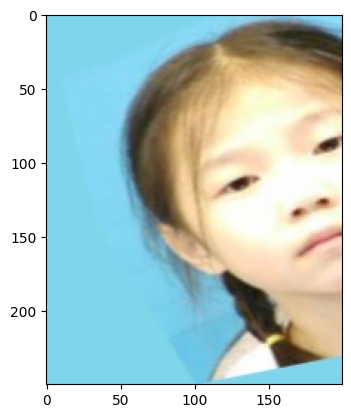

In [10]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(cv2.imread(blue_photo[5470]).astype('uint8'), cv2.COLOR_BGR2RGB))

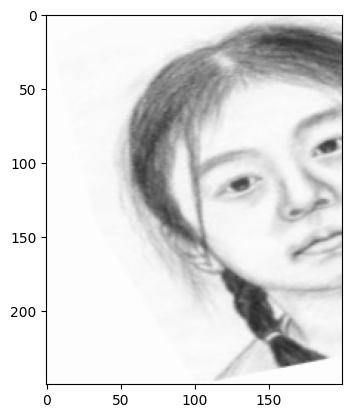

In [11]:
plt.imshow(cv2.cvtColor(cv2.imread(blue_sketch[5470]).astype('uint8'), cv2.COLOR_BGR2RGB))

In [21]:
img_shape = (256, 256, 3)

d_model = discriminator(img_shape)

g_model = generator(img_shape)

gan_model = GAN(g_model, d_model, img_shape)

In [22]:
gan_model.summary()

Model: "GAN"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 generator (Functional)      (None, 256, 256, 3)          4184358   ['input_4[0][0]']             
                                                          7                                       
                                                                                                  
 discriminator (Functional)  (None, 64, 64, 1)            541249    ['input_4[0][0]',             
                                                                     'generator[0][0]']           
                                                                                                

In [23]:
opt = Adam(learning_rate=2e-4, beta_1=0.5)

d_model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
gan_model.compile(loss=['binary_crossentropy', total_loss], optimizer=opt, loss_weights=[1,100])

In [24]:
import tensorflow as tf
from tensorflow import keras
g_model = tf.keras.models.load_model('g_model.h5')

In [25]:
train(d_model, g_model, gan_model, [blue_sketch, blue_photo], 'C:/Users/ASUS/OneDrive/Desktop/datasets/model_second/', n_epochs = 100, n_batch=16)

 ========== Epoch 1 ========== 
1/1 [==============================] - 6s 6s/step
Batch : 1, D Loss : 0.511 | G Loss : 22.105
1/1 [==============================] - 8s 8s/step
Batch : 2, D Loss : 0.496 | G Loss : 19.802
1/1 [==============================] - 8s 8s/step
Batch : 3, D Loss : 0.501 | G Loss : 15.372
1/1 [==============================] - 8s 8s/step
Batch : 4, D Loss : 0.498 | G Loss : 13.823
1/1 [==============================] - 7s 7s/step
Batch : 5, D Loss : 0.502 | G Loss : 13.109
1/1 [==============================] - 8s 8s/step
Batch : 6, D Loss : 0.514 | G Loss : 13.527
1/1 [==============================] - 8s 8s/step
Batch : 7, D Loss : 0.515 | G Loss : 13.277
1/1 [==============================] - 7s 7s/step
Batch : 8, D Loss : 0.527 | G Loss : 12.220
1/1 [==============================] - 8s 8s/step
Batch : 9, D Loss : 0.499 | G Loss : 11.685
1/1 [==============================] - 7s 7s/step
Batch : 10, D Loss : 0.497 | G Loss : 10.594
1/1 [======================

1/1 [==============================] - 4s 4s/step
Batch : 88, D Loss : 0.511 | G Loss : 6.378
1/1 [==============================] - 4s 4s/step
Batch : 89, D Loss : 0.509 | G Loss : 6.865
1/1 [==============================] - 4s 4s/step
Batch : 90, D Loss : 0.518 | G Loss : 7.064
1/1 [==============================] - 4s 4s/step
Batch : 91, D Loss : 0.502 | G Loss : 6.276
1/1 [==============================] - 3s 3s/step
Batch : 92, D Loss : 0.501 | G Loss : 6.069
1/1 [==============================] - 4s 4s/step
Batch : 93, D Loss : 0.517 | G Loss : 6.624
1/1 [==============================] - 4s 4s/step
Batch : 94, D Loss : 0.514 | G Loss : 6.129
1/1 [==============================] - 3s 3s/step
Batch : 95, D Loss : 0.517 | G Loss : 6.603
1/1 [==============================] - 3s 3s/step
Batch : 96, D Loss : 0.502 | G Loss : 6.915
1/1 [==============================] - 4s 4s/step
Batch : 97, D Loss : 0.500 | G Loss : 6.242
1/1 [==============================] - 3s 3s/step
Batch : 98

1/1 [==============================] - 4s 4s/step
Batch : 260, D Loss : 0.505 | G Loss : 4.932
1/1 [==============================] - 4s 4s/step
Batch : 261, D Loss : 0.498 | G Loss : 5.219
1/1 [==============================] - 3s 3s/step
Batch : 262, D Loss : 0.509 | G Loss : 4.962
1/1 [==============================] - 4s 4s/step
Batch : 263, D Loss : 0.494 | G Loss : 5.438
1/1 [==============================] - 4s 4s/step
Batch : 264, D Loss : 0.514 | G Loss : 5.517
1/1 [==============================] - 4s 4s/step
Batch : 265, D Loss : 0.503 | G Loss : 6.105
1/1 [==============================] - 4s 4s/step
Batch : 266, D Loss : 0.526 | G Loss : 5.758
1/1 [==============================] - 4s 4s/step
Batch : 267, D Loss : 0.516 | G Loss : 5.178
1/1 [==============================] - 4s 4s/step
Batch : 268, D Loss : 0.501 | G Loss : 5.919
1/1 [==============================] - 4s 4s/step
Batch : 269, D Loss : 0.498 | G Loss : 5.592
1/1 [==============================] - 3s 3s/step


KeyboardInterrupt: 

1/1 [==============================] - 0s 216ms/step


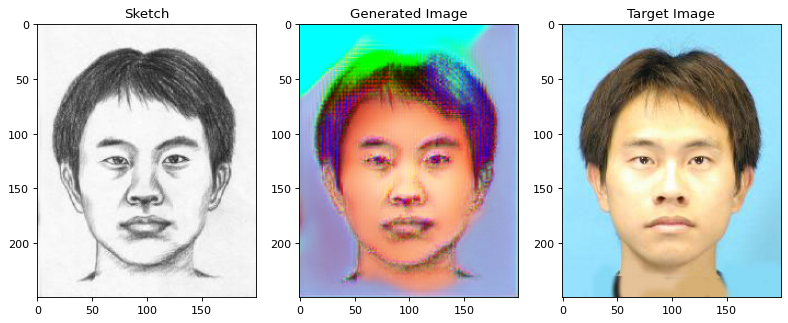

In [36]:
import numpy as np
img = tf.keras.preprocessing.image.load_img('C:/Users/ASUS/Downloads/Face-Sketch-to-Image-Generation-using-GAN-master/Face-Sketch-to-Image-Generation-using-GAN-master/Dataset/CUHK/Testing sketch/m1-002-01-sz1.jpg', target_size=(256, 256))
target = cv2.cvtColor(cv2.imread('C:/Users/ASUS/Downloads/Face-Sketch-to-Image-Generation-using-GAN-master/Face-Sketch-to-Image-Generation-using-GAN-master/Dataset/CUHK/Testing photo/m1-002-01.jpg'), cv2.COLOR_BGR2RGB)

# convert to numpy array
img = np.array(img)
norm_img = (img.copy() - 127.5) / 127.5

g_img = g_model.predict(np.expand_dims(norm_img, 0))[0]
g_img = g_img * 127.5 + 127.5

img = cv2.resize(img, (200, 250))
g_img = cv2.resize(g_img, (200, 250))

f = plt.figure(num=None, figsize=(12, 6), dpi=80)
ax1 = f.add_subplot(1,3, 1)
plt.imshow(img.astype('uint8'))
ax2 = f.add_subplot(1,3, 2)
plt.imshow(g_img.astype('uint8'))
ax3 = f.add_subplot(1,3, 3)
plt.imshow(target.astype('uint8'))
ax1.set_title('Sketch')
ax2.set_title('Generated Image')
ax3.set_title('Target Image')

plt.show(block=True)

In [29]:
def pred_images(g_model, target_dir, filenames, batch_size=128):
    if not os.path.exists(target_dir):
        os.mkdir(target_dir)

    imgs = load_images(filenames)
    g_img = g_model.predict(imgs)
    g_img = g_img * 127.5 + 127.5
    for j, _img in enumerate(g_img):
        cv2.imwrite(target_dir + "/" + os.path.basename(filenames[j]), cv2.resize(cv2.cvtColor(_img.astype('uint8'), cv2.COLOR_RGB2BGR), (200, 250)))
    print("Image has been successfully saved in \"" + target_dir + "\" folder")

In [15]:
test_file = load_filename('C:/Users/ASUS/Downloads/Face-Sketch-to-Image-Generation-using-GAN-master/Face-Sketch-to-Image-Generation-using-GAN-master/Dataset/Google Sketch/')

In [28]:
pred_images(g_model,'C:/Users/ASUS/OneDrive/Desktop/datasets/goggleresult/',test_file)

NameError: name 'pred_images' is not defined

In [2]:
!pip install skimage

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [3 lines of output]
  
  *** Please install the `scikit-image` package (instead of `skimage`) ***
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'skimage'

In [30]:
def compute_l2(imgs1, imgs2):
    l2_scores = []
    for i in range(len(imgs1)):
        score = (np.square(imgs1[i] - imgs2[i])).mean()
        l2_scores.append(score)
    return np.mean(l2_scores)

In [31]:
imgs1 = load_images(load_filename("C:/Users/ASUS/Downloads/Face-Sketch-to-Image-Generation-using-GAN-master/Face-Sketch-to-Image-Generation-using-GAN-master/Dataset/CUHK/Testing photo/"))
imgs2 = load_images(load_filename("C:/Users/ASUS/OneDrive/Desktop/datasets/results/"))

l2 = compute_l2(imgs1, imgs2)

print("Pixel loss weight : 1 - Contextual loss weight : 0 => L2-norm: " + str(l2))

Pixel loss weight : 1 - Contextual loss weight : 0 => L2-norm: 0.19851747822852586
